## L1 – Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can find basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) problems.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we focus on supervised learning only. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is a matrix, where $i$-th row is a feature vector of $i$-th object and $Y$ – a vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and train regression model.
2. Plot train data and model's predictions.
3. As you can see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

import time

import matplotlib.cm as cm
import matplotlib.pyplot as plt

import gzip, pickle

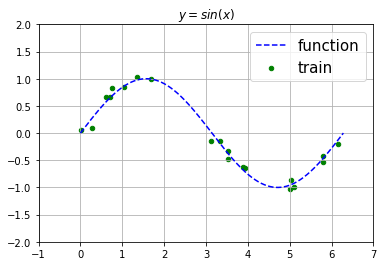

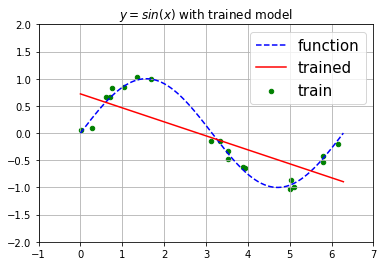

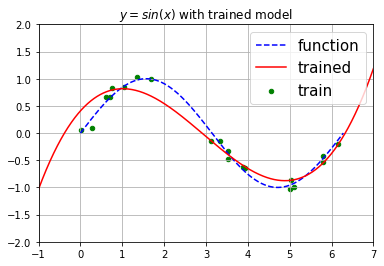

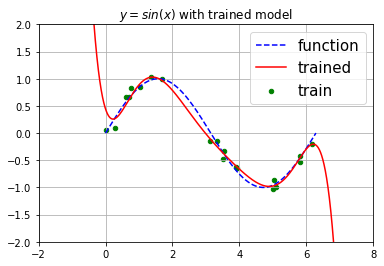

In [6]:
# 1 (generating)


def generate(count):
    data = {}
    
    data['main_x'] = np.linspace(0, 2*np.pi, 10000)
    data['show_x'] = np.linspace(-2, 8, 10000)
    data['main_y'] = np.sin(data['main_x'])
    
    data['train_x'] = np.sort(np.random.choice(data['main_x'], count))
    data['train_y'] = np.sin(data['train_x']) + np.random.normal(0, 0.1, count)
    
    return data


data = generate(20)

plt.plot(data['main_x'], data['main_y'], 'b--', alpha=1, label='function')
plt.scatter(data['train_x'], data['train_y'], 20, 'g', 'o', alpha=1, label='train')

plt.ylim(-2, 2)
plt.xlim(-1, 7)

plt.title('$y=sin(x)$')
plt.legend(loc='upper right', prop={'size' : 15})
plt.grid(True)

plt.show()

# (training)

x = np.array([np.ones(data['train_x'].shape[0]), data['train_x']]).T
x1 = np.array([np.ones(data['main_x'].shape[0]), data['main_x']]).T

w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), data['train_y'])

y_trained = np.dot(w, x1.T)


# 2 (plotting)


plt.plot(data['main_x'], data['main_y'], 'b--', alpha=1, label='function')
plt.scatter(data['train_x'], data['train_y'], 20, 'g', 'o', alpha=1, label='train')
plt.plot(data['main_x'], y_trained, 'r', alpha=1, label='trained')

plt.ylim(-2, 2)
plt.xlim(-1, 7)

plt.title('$y=sin(x)$ with trained model')
plt.legend(loc='upper right', prop={'size' : 15})
plt.grid(True)

plt.show()


# 3 + 4 (adding x^2 and x^3, training and plotting)

x = np.array([np.ones(data['train_x'].shape[0]) + data['train_x']**n for n in range(1, 4)]).T
x_0 =  np.array([np.ones(data['show_x'].shape[0]) + data['show_x']**n for n in range(1, 4)]).T
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), data['train_y'])

y_trained = np.dot(w, x_0.T)

plt.plot(data['main_x'], data['main_y'], 'b--', alpha=1, label='function')
plt.scatter(data['train_x'], data['train_y'], 20, 'g', 'o', alpha=1, label='train')
plt.plot(data['show_x'], y_trained, 'r', alpha=1, label='trained')

plt.ylim(-2, 2)
plt.xlim(-1, 7)

plt.title('$y=sin(x)$ with trained model')
plt.legend(loc='upper right', prop={'size' : 15})
plt.grid(True)

plt.show()

# 5 (adding the whole range x^0 ... x^7)

x = np.array([np.ones(data['train_x'].shape[0]) + data['train_x']**n for n in range(1, 8)]).T
x_0 = np.array([np.ones(data['show_x'].shape[0]) + data['show_x']**n for n in range(1, 8)]).T
w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), data['train_y'])

y_trained = np.dot(w, x_0.T)

plt.plot(data['main_x'], data['main_y'], 'b--', alpha=1, label='function')
plt.scatter(data['train_x'], data['train_y'], 20, 'g', 'o', alpha=1, label='train')
plt.plot(data['show_x'], y_trained, 'r', alpha=1, label='trained')

plt.ylim(-2, 2)
plt.xlim(-2, 8)

plt.title('$y=sin(x)$ with trained model')
plt.legend(loc='upper right', prop={'size' : 15})
plt.grid(True)

plt.show()

As we can see, adding more features is not leading to increasing forecasting ability of a model, is starts not to extrapolate the data, but to interpolate it, so it leads to $\textbf{overfitting}.$

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - use p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and use each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train and validation sets.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

Iteration:  1

Degree:  2
Whole data mse * 10^3:  5.17987040181812
Validation mse * 10^3:  7.811261211818158



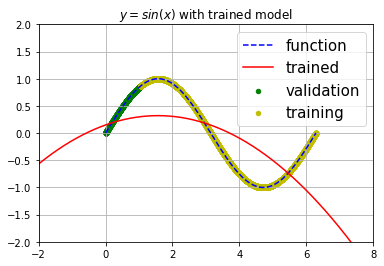

Degree:  3
Whole data mse * 10^3:  2.180200081500411
Validation mse * 10^3:  12.189356011097233



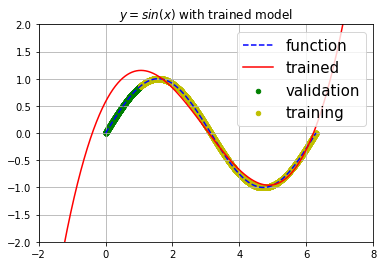

Degree:  4
Whole data mse * 10^3:  1.8896382751171004
Validation mse * 10^3:  10.478440840536873



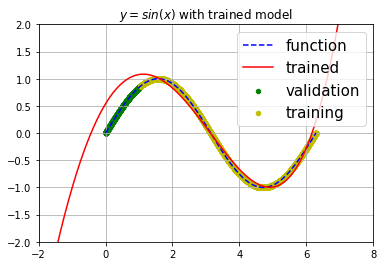

Degree:  5
Whole data mse * 10^3:  0.8196997668090669
Validation mse * 10^3:  4.899354060990291



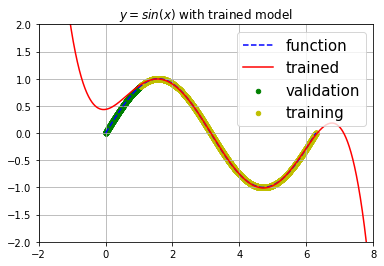

Degree:  6
Whole data mse * 10^3:  0.694919410684853
Validation mse * 10^3:  4.168179643688599



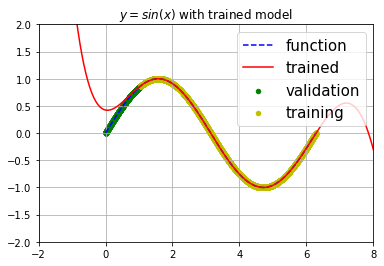

Degree:  7
Whole data mse * 10^3:  0.7159154814146934
Validation mse * 10^3:  4.294341735744334



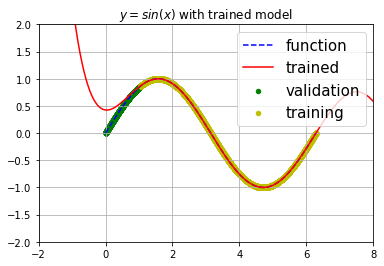

Degree:  8
Whole data mse * 10^3:  0.6737842398259243
Validation mse * 10^3:  4.041810981239752



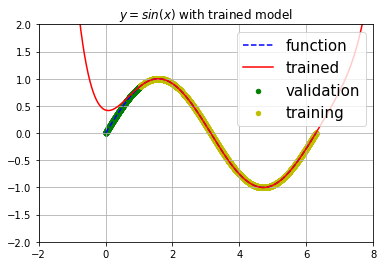

Degree:  9
Whole data mse * 10^3:  0.627863310377795
Validation mse * 10^3:  3.7664073619192253



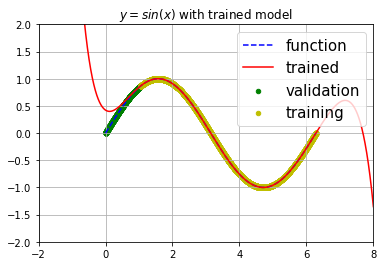

Iteration:  2

Degree:  2
Whole data mse * 10^3:  5.445432011385202
Validation mse * 10^3:  19.848577217100644



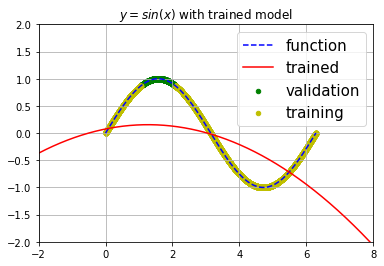

Degree:  3
Whole data mse * 10^3:  1.9402863463670794
Validation mse * 10^3:  5.30741512890702



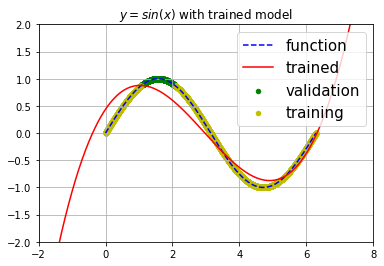

Degree:  4
Whole data mse * 10^3:  1.5595439526055743
Validation mse * 10^3:  5.809977526691067



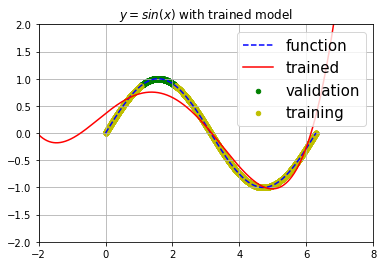

Degree:  5
Whole data mse * 10^3:  0.6678255459562134
Validation mse * 10^3:  2.0354555478515777



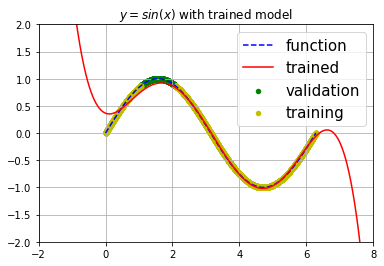

Degree:  6
Whole data mse * 10^3:  0.5459875399484534
Validation mse * 10^3:  0.7227942458214994



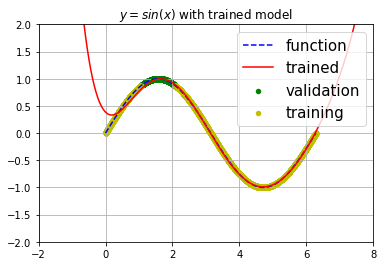

Degree:  7
Whole data mse * 10^3:  0.5278062052277182
Validation mse * 10^3:  0.9792971343428073



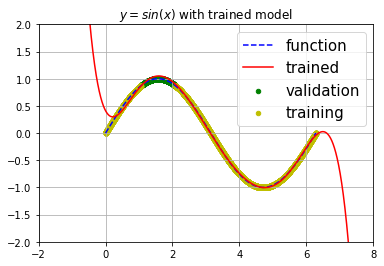

Degree:  8
Whole data mse * 10^3:  0.4786315384916256
Validation mse * 10^3:  0.6287909502427115



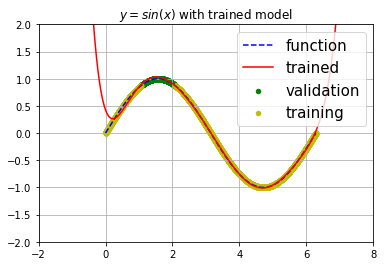

Degree:  9
Whole data mse * 10^3:  0.49046159531675715
Validation mse * 10^3:  1.5270364535092749



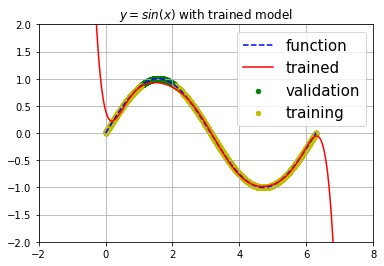

Iteration:  3

Degree:  2
Whole data mse * 10^3:  5.200178652226566
Validation mse * 10^3:  8.377442876570624



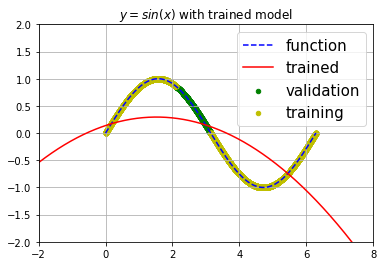

Degree:  3
Whole data mse * 10^3:  1.9726788089354155
Validation mse * 10^3:  6.877420321554528



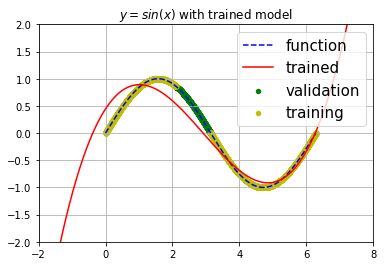

Degree:  4
Whole data mse * 10^3:  1.466088867219228
Validation mse * 10^3:  3.3293587975975223



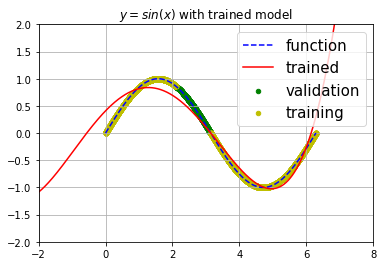

Degree:  5
Whole data mse * 10^3:  0.6467314894680557
Validation mse * 10^3:  1.3205526271824315



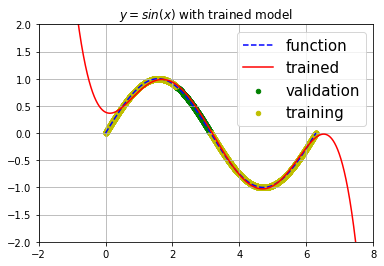

Degree:  6
Whole data mse * 10^3:  0.5455023905809644
Validation mse * 10^3:  0.4555547672489724



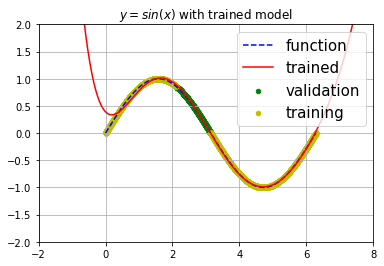

Degree:  7
Whole data mse * 10^3:  0.5275223671500501
Validation mse * 10^3:  0.9599844465884955



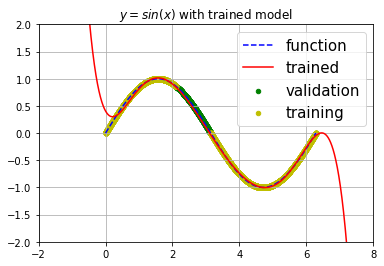

Degree:  8
Whole data mse * 10^3:  0.47993886915304884
Validation mse * 10^3:  0.6997633513787845



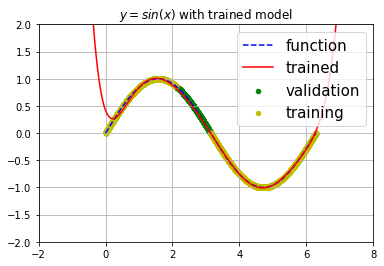

Degree:  9
Whole data mse * 10^3:  0.4600103957004469
Validation mse * 10^3:  1.067165715558586



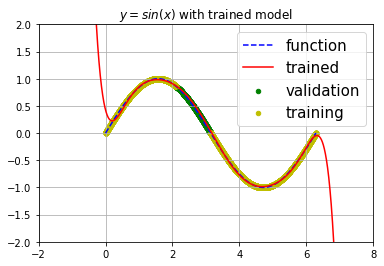

Iteration:  4

Degree:  2
Whole data mse * 10^3:  5.348133626970678
Validation mse * 10^3:  17.40530731921725



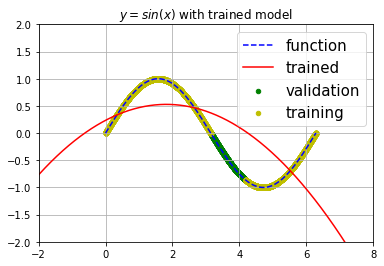

Degree:  3
Whole data mse * 10^3:  1.8882588673360208
Validation mse * 10^3:  2.8535018466464566



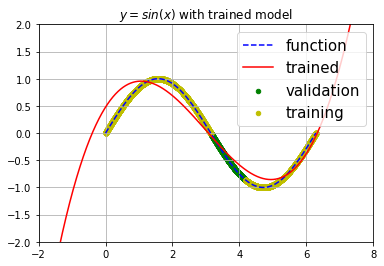

Degree:  4
Whole data mse * 10^3:  1.5472569058547343
Validation mse * 10^3:  5.371235811602098



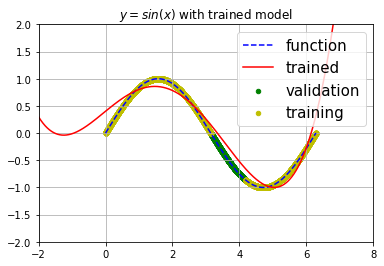

Degree:  5
Whole data mse * 10^3:  0.6254686836117119
Validation mse * 10^3:  0.3579851585934402



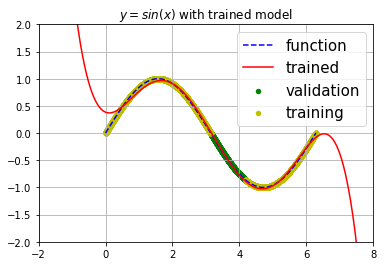

Degree:  6
Whole data mse * 10^3:  0.5510561350412386
Validation mse * 10^3:  0.7025717998844759



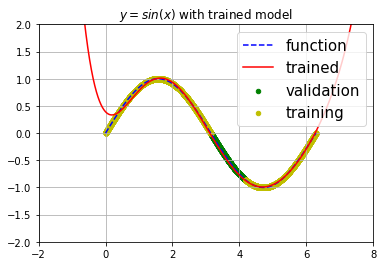

Degree:  7
Whole data mse * 10^3:  0.5163957771410989
Validation mse * 10^3:  0.60600953717788



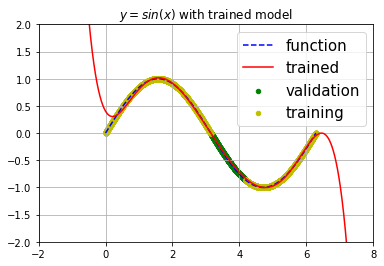

Degree:  8
Whole data mse * 10^3:  0.47966375635555636
Validation mse * 10^3:  0.6771471709109763



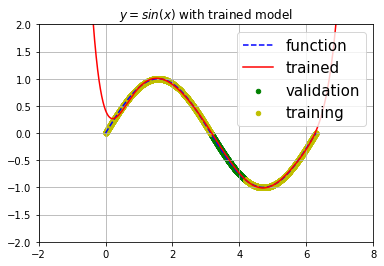

Degree:  9
Whole data mse * 10^3:  0.4597568778979982
Validation mse * 10^3:  1.0508775267986814



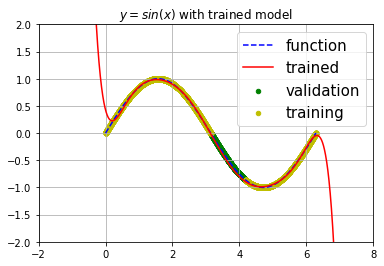

Iteration:  5

Degree:  2
Whole data mse * 10^3:  5.434070647835431
Validation mse * 10^3:  19.987434978792518



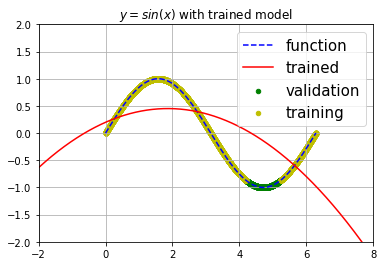

Degree:  3
Whole data mse * 10^3:  1.9471721009073197
Validation mse * 10^3:  4.960767114776021



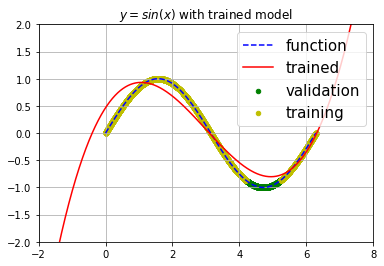

Degree:  4
Whole data mse * 10^3:  1.4303351284085748
Validation mse * 10^3:  2.086404371556808



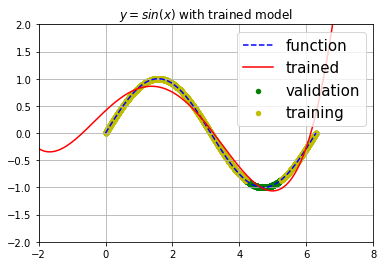

Degree:  5
Whole data mse * 10^3:  0.638951742517706
Validation mse * 10^3:  1.056551946868708



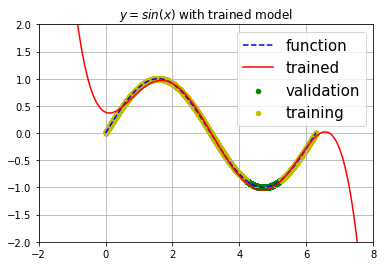

Degree:  6
Whole data mse * 10^3:  0.5578496613374759
Validation mse * 10^3:  0.8863721347062742



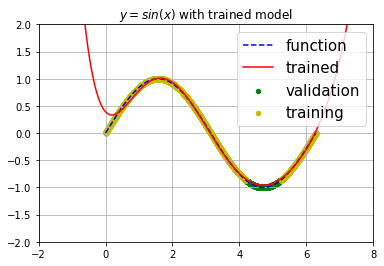

Degree:  7
Whole data mse * 10^3:  0.5146258918006341
Validation mse * 10^3:  0.5274546022164098



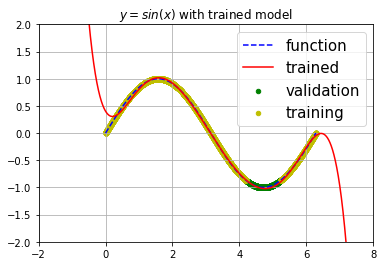

Degree:  8
Whole data mse * 10^3:  0.47963202364287305
Validation mse * 10^3:  0.6639978472134743



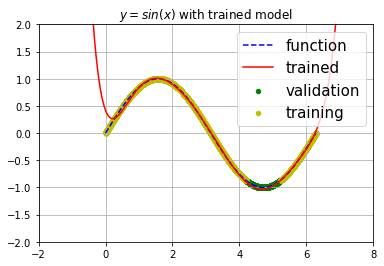

Degree:  9
Whole data mse * 10^3:  0.47967782230020467
Validation mse * 10^3:  1.3472852292108817



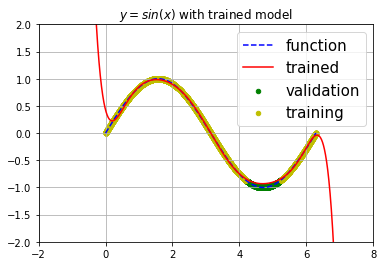

Iteration:  6

Degree:  2
Whole data mse * 10^3:  8.776334861167518
Validation mse * 10^3:  50.482309938809145



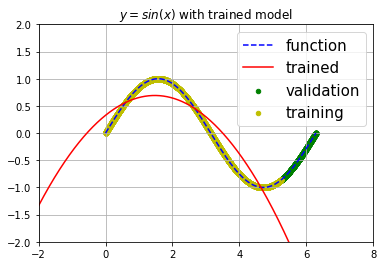

Degree:  3
Whole data mse * 10^3:  3.311339290490263
Validation mse * 10^3:  17.09427750611279



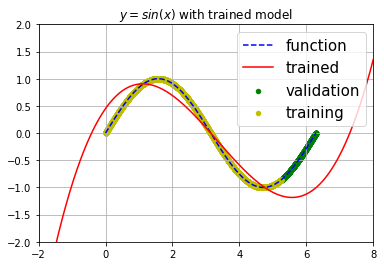

Degree:  4
Whole data mse * 10^3:  6.529424673238578
Validation mse * 10^3:  38.83321482645433



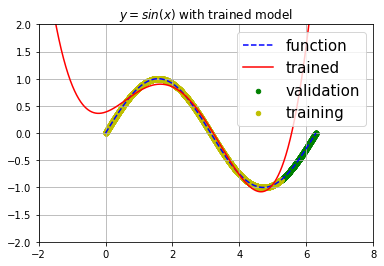

Degree:  5
Whole data mse * 10^3:  3.0128825167258118
Validation mse * 10^3:  17.756374682456432



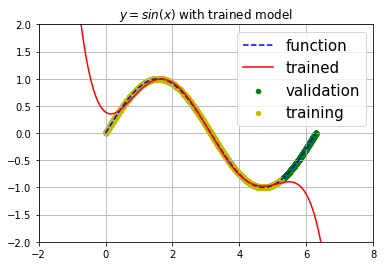

Degree:  6
Whole data mse * 10^3:  4.344529167887593
Validation mse * 10^3:  25.889524353779557



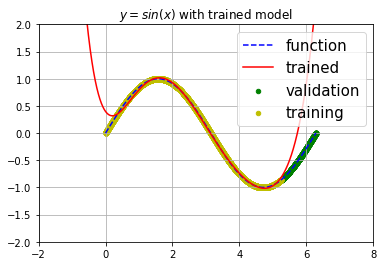

Degree:  7
Whole data mse * 10^3:  9.51849590475566
Validation mse * 10^3:  57.0611063099635



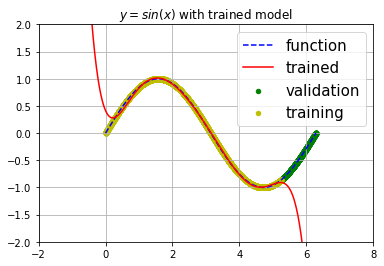

Degree:  8
Whole data mse * 10^3:  20.31615598004976
Validation mse * 10^3:  121.91739469970587



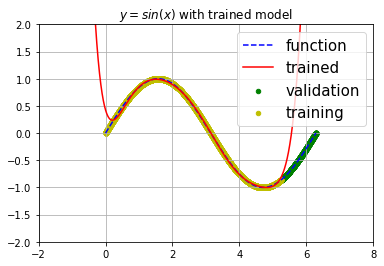

Degree:  9
Whole data mse * 10^3:  44.65318428702714
Validation mse * 10^3:  268.0159334217443



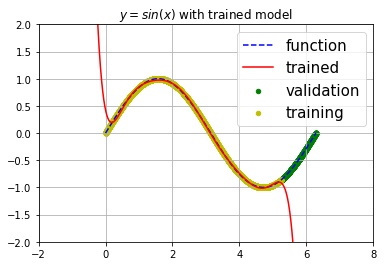

In [7]:
data = generate(100)

kf = KFold(n_splits = 6)
iteration = 1

for train_index, test_index in kf.split(data['main_x']):
    
    print('Iteration: ', iteration)
    print()
    iteration += 1
    
    train_x = np.array([data['main_x'][i] for i in train_index])
    test_x = np.array([data['main_x'][i] for i in test_index])
    
    train_y = np.array([data['main_y'][i] for i in train_index])
    test_y = np.array([data['main_y'][i] for i in test_index])
    
    for i in range(2, 10):
        
        print('Degree: ', i)
        x = np.array([np.ones(train_x.shape[0]) + train_x**n for n in range(1, i + 1)]).T
        x1 = np.array([np.ones(data['main_x'].shape[0]) + data['main_x']**n for n in range(1, i + 1)]).T
        x_0 = np.array([np.ones(data['show_x'].shape[0]) + data['show_x']**n for n in range(1, i + 1)]).T
        x2 = np.array([np.ones(test_x.shape[0]) + test_x**n for n in range(1, i + 1)]).T
        
        w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), train_y)
        
        y_trained = np.dot(w, x1.T)
        y_show = np.dot(w, x_0.T)
        y_validation = np.dot(w, x2.T)
        
        mse = (np.sqrt(np.sum((y_trained - data['main_y'])**2)) / y_trained.shape[0]) * 1000
        mse_validation = (np.sqrt(np.sum((y_validation - test_y)**2)) / test_y.shape[0]) * 1000
        
        print('Whole data mse * 10^3: ', mse)
        print('Validation mse * 10^3: ', mse_validation)
        print()
        
        plt.plot(data['main_x'], data['main_y'], 'b--', alpha=1, label='function')
        plt.scatter(test_x, test_y, 20, 'g', 'o', alpha=1, label='validation')
        plt.scatter(train_x, train_y, 20, 'y', 'o', alpha=1, label='training')
        plt.plot(data['show_x'], y_show, 'r', alpha=1, label='trained')
        
        plt.ylim(-2, 2)
        plt.xlim(-2, 8)

        plt.title('$y=sin(x)$ with trained model')
        plt.legend(loc='upper right', prop={'size' : 15})
        plt.grid(True)

        plt.show()

It is fairly obvious, that splitting data into train/test set should be done the following way - train set should be spread all over the data field, as normal as possible.

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is a normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Read [this](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) article about MLE.
2. Get the likelihood function for a random [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) value with the probability $p$ of a successful outcome.
3. Let's suppouse that our estimation of $p$ is $\sigma(w^Tx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that Logistic loss function $$\arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$ is nothing like the maximization of the likelihood.
4. Plot all loss functions in the axes $M \times L$.
5. Generate two normally distributed sets of points on the plane.
6. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
7. Train linear classifier with MSE (use analytical solution), which splits these sets.
8. Plot points and separating line of trained classifier.
9. What is time comlexity of your solution?

#### № 2

$L(x | p) = \sum\limits_{i=1}^{n}\ln(f_x(x_i | p))$

$f_x(x_i | p) = [y=1] \cdot p + [y = 0] \cdot (1 - p)$

$L(x | p) = \#[y = 1] \cdot p + \#[y = 0] \cdot (1 - p)$

#### № 3

$ p = \dfrac{1}{1 + e^{-w^Tx}}; \quad 1 - p = 1 - \dfrac{1}{1 + e^{-w^Tx}} = \dfrac{e^{-w^Tx}}{1 + e^{-w^Tx}} = \dfrac{1}{1 + e^{w^Tx}}$

$P(y|x, w) = \sigma(yw^Tx)$

$P(y|X, w) = \prod (yw^Tx)$

$\ln(P(y|X, w)) = \sum\sigma(yw^Tx) = \sum\ln(\dfrac{1}{1+exp(-yw^Tx)}=-\sum\ln(1+exp(-yw^Tx))$

Становится очевидно, что минимизация одного это ни что иное как максимизация другого.

$\sum\ln(1+exp(-yw^Tx))$ Is this loss...

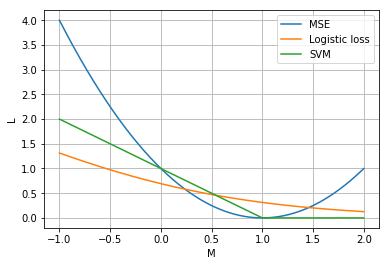

In [8]:
# setting data for functions (№4)

data = {}

data['x'] = np.linspace(-1, 2, 1000)
data['y_1'] = (data['x']-1)**2
data['y_2'] = np.log(1 + np.exp(-data['x']))

plt.plot(data['x'], (data['x']-1)**2, label='MSE') # mse
plt.plot(data['x'], np.log(1 + np.exp(-data['x'])), label='Logistic loss') # logostic loss
plt.plot(data['x'], [max(0, 1 - data['x'][i]) for i in range(data['x'].shape[0])], label='SVM') # svm

plt.xlabel('M')
plt.ylabel('L')

plt.legend()
plt.grid(True)

plt.show()

Analitical solution:  [-0.34929026  0.32915327 -0.69142289]
Total time:  0.011287000000002934


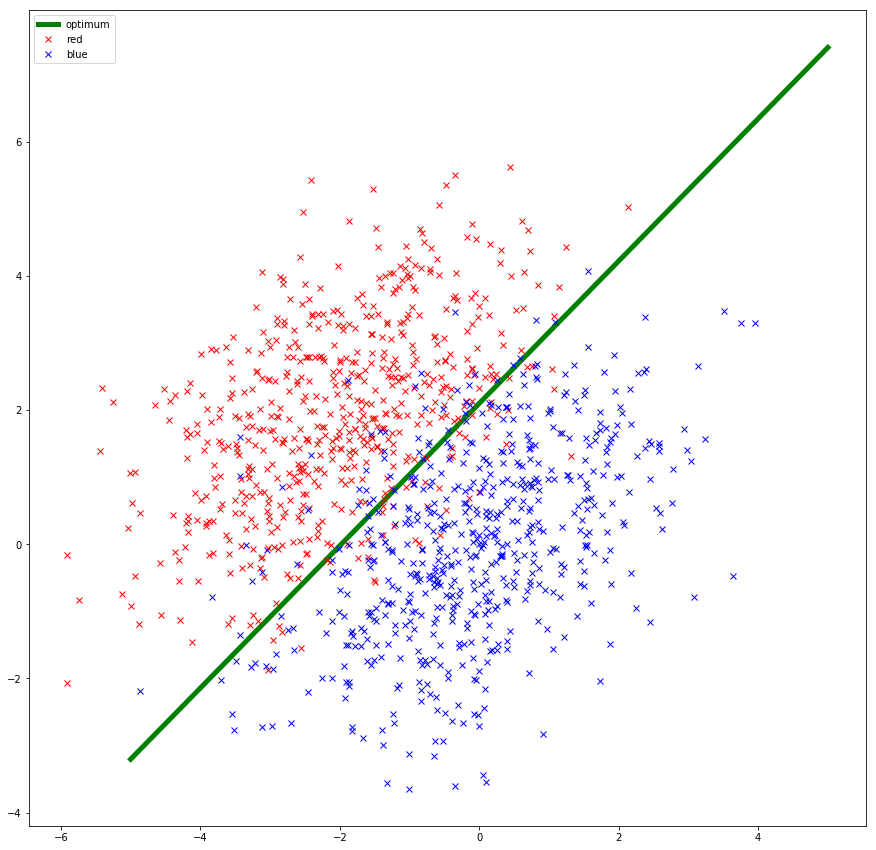

In [9]:
# 5 - 8

start = time.clock()

count = 600

# initialisation of dots "clouds"

red = np.random.multivariate_normal(np.array([-2, 2]), np.array([[2, 1],[1,2]]), count).T
blue = np.random.multivariate_normal(np.array([0,0]), np.array([[2,1],[1,2]]), count).T

x = np.hstack((red, blue)).T
x = np.hstack((x, np.ones((2 * count, 1))))

y1 = np.ones(count)
y2 = np.ones(count)
y2 *= -1
new_y = np.hstack((y1, y2))

w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), new_y)

print("Analitical solution: ", w)

k = -w[0]/w[1]
b = -w[2]/w[1]

data = {}
data['x'] = np.linspace(-5, 5, 1000)
data['y'] = data['x'] * k + b

finish = time.clock()

print("Total time: ", finish - start)

plt.figure(figsize=(15, 15))
plt.plot(data['x'], data['y'], linewidth=5, color='green', label='optimum')

plt.plot(red[0], red[1], 'x', color = 'r', label='red')
plt.plot(blue[0], blue[1], 'x', color = 'b', label='blue')

plt.legend()
plt.show()

It is quite obvoius, that we first multiply x.T and x, the complexity is $O(n^2)$. Then we find the inverse matrix of $n \times n$ matrix at estimated time $O(n^3)$, then all other multipication by $O(n^2)$ $\Rightarrow$ total $O(n^3)$. 

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

### 1

Let us suppose a function such as paraboloid ($Q : \mathbb{R}^2 \rightarrow \mathbb{R}$, $Q = x^2 + y^2$).

Then it has one global minimum ($x = 0, y = 0$).

Starting point: x =  42.17023997183804  y =  60.40111688003579
Finish point: x =  2.800617999537763e-09  y =  4.011370465033661e-09
Number of iterations:  1160
TIme:  6.794095000000006


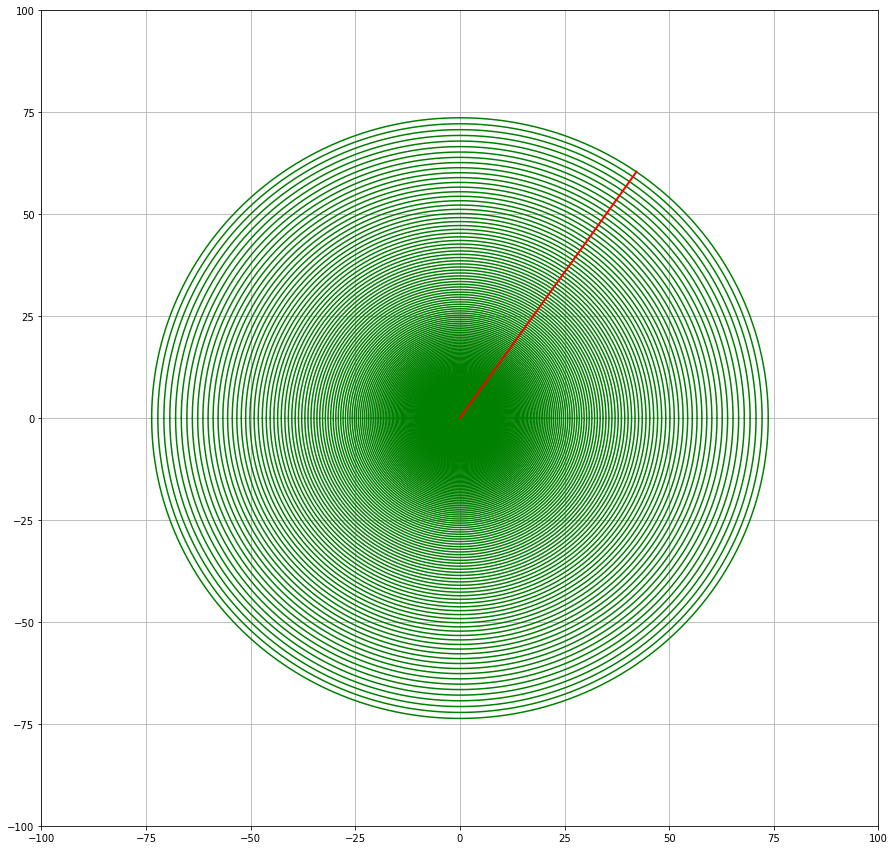

In [10]:
import time
# returning gradient

def gradient(x, y):
    return [2 * x, 2 * y]

# counting epsilon 

def eps(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

# doing main work 

def gradient_descent():
    
    start = time.clock()
    
    plt.figure(figsize=(15, 15))
    
    # initialisation of starting point
    
    data = {}
    data['x'] = [np.random.random() * 100]
    data['y'] = [np.random.random() * 100]
    
    # initialisation of coefs
    
    iteration = 0
    e = 1
    la = 1/100
    
    while (e > (10)**-10):
        
        gr = gradient(data['x'][iteration], data['y'][iteration])
        
        new_x = (data['x'][iteration] - la * gr[0])
        new_y = (data['y'][iteration] - la * gr[1])
        
        data['x'].append(new_x)
        data['y'].append(new_y)
        
        iteration += 1
        
        e = eps([data['x'][iteration - 1], data['y'][iteration - 1]], [data['x'][iteration], data['y'][iteration]])
        
        r = np.sqrt(data['x'][iteration - 1]**2 + data['y'][iteration - 1]**2)
        d = np.linspace(-r, r, 10000)
        y1 = np.sqrt(r**2 - d**2)
        y2 = -y1
        
        plt.plot(d, y1, color='green')
        plt.plot(d, y2, color='green')
    
    finish = time.clock()
        
    
    print("Starting point: x = ", data['x'][0], " y = ", data['y'][0])
    print("Finish point: x = ", data['x'][iteration], " y = ", data['y'][iteration])
    print("Number of iterations: ", iteration)
    print("TIme: ", finish - start)
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.grid(True)
    plt.plot(data['x'], data['y'], color='red', linewidth=2)
    plt.show()
    
gradient_descent()

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

/home/birsert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in sqrt
/home/birsert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in sqrt


Starting point: x =  1.0143152838780012  y =  1.2749258665595231
Finish point: x =  1.0001118127694841  y =  1.0002240854407338
Accuracy:  0.0002504323864211326
Number of iterations:  1768129
TIme:  5.990866999999994


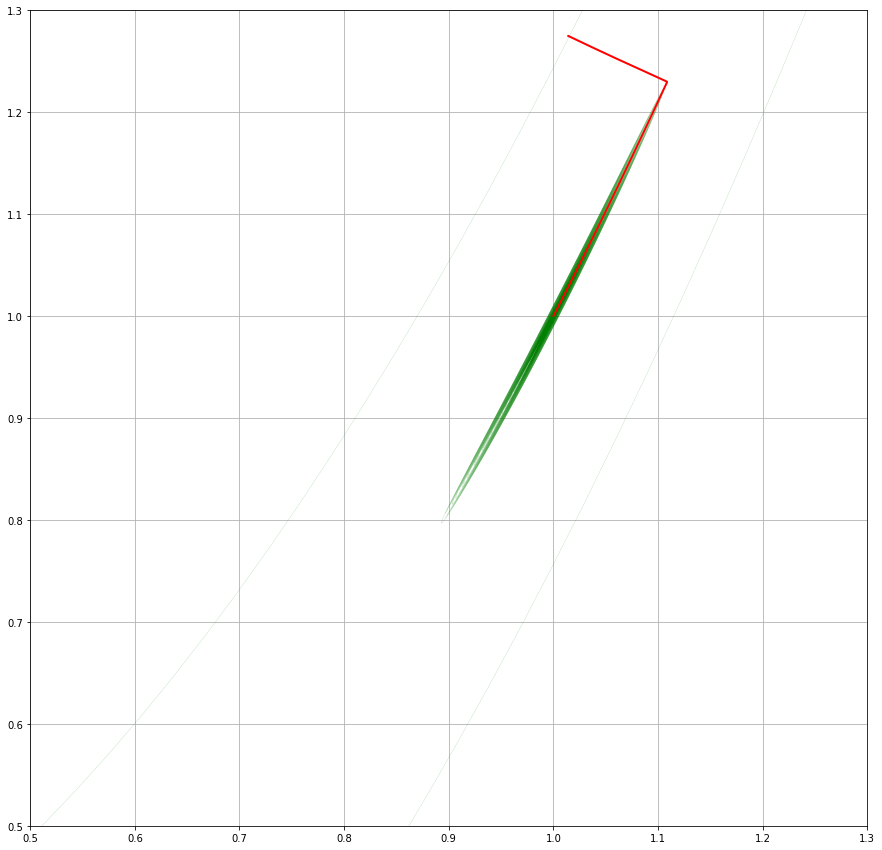

In [11]:
import time

# returning gradient

def gradient(x, y):
    return [2*(200*(x**3) - 200*x*y+x-1),  200*(y - x**2)]

# calculating epsilon

def eps(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

# returning function value in the point

def func(x, y):
    return ((1-x)**2 + 100 * ((y - x**2)**2))

# doing the main job

def gradient_descent():
    
    start = time.clock()
    
    plt.figure(figsize=(15, 15))
    
    # initialisation of starting point
    
    data = {}
    data['x'] = [np.random.random() * 10]
    data['y'] = [np.random.random() * 10]
    
    # initialisation of coefs
    
    iteration = 0
    e = 1
    la = 1/100000
    
    while (e > (10)**-9):
        
        gr = gradient(data['x'][iteration], data['y'][iteration])
        
        new_x = (data['x'][iteration] - la * gr[0])
        new_y = (data['y'][iteration] - la * gr[1])
        
        data['x'].append(new_x)
        data['y'].append(new_y)
        
        if (iteration % 5000 == 0):
            c = func(new_x, new_y)
            d = np.linspace(max(-1, 1 - np.sqrt(c)), min(2, np.sqrt(c) + 1), 100)
            y1 = np.sqrt(c - (1-d)**2)/10+ d**2
            y2 = -np.sqrt(c - (1-d)**2)/10+ d**2
            plt.plot(d, y1, color='green', linewidth=0.1)
            plt.plot(d,y2, color='green', linewidth=0.1)
        
        iteration += 1
        
        e = eps([data['x'][iteration - 1], data['y'][iteration - 1]], [data['x'][iteration], data['y'][iteration]])
    
    
    finish = time.clock()
        
    print("Starting point: x = ", data['x'][0], " y = ", data['y'][0])
    print("Finish point: x = ", data['x'][iteration], " y = ", data['y'][iteration])
    print("Accuracy: ", np.sqrt((1 - data['x'][iteration])**2 + (1 - data['y'][iteration])**2))
    print("Number of iterations: ", iteration)
    print("TIme: ", finish - start)
    plt.xlim(0.5, 1.3)
    plt.ylim(0.5, 1.3)
    plt.grid(True)
    plt.plot(data['x'], data['y'], color='red', linewidth=2)
    plt.show()
    
gradient_descent()

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

Iterations:  67
Finish point:  [-0.32355690490036765, 0.3353234730100521, -0.6787576671700218]
Analitical solution:  [-0.32355768  0.33532434 -0.67876037]
Accuracy:  2.6046351402908563e-06
Total time:  0.3969510000000014


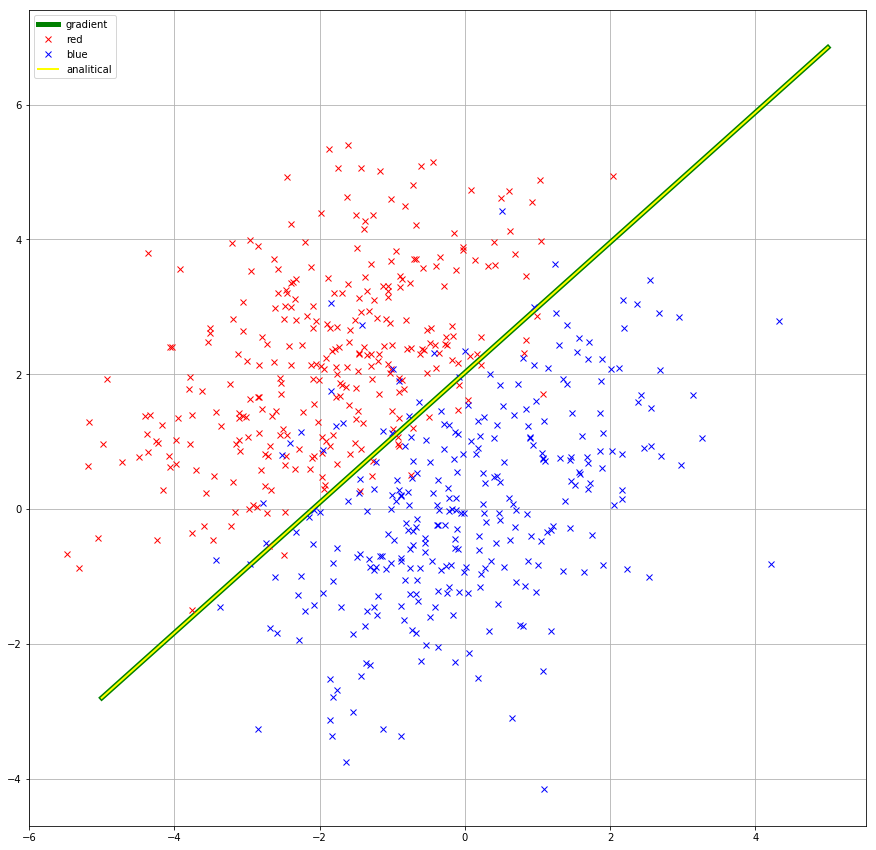

In [12]:
import time

start = time.clock()

count = 300

# defining derivatives

def der_k1(X, Y, w):
    summ = 0
    for i in range(600):
        summ += (1 - Y[i] * (X[i][0] * w[0] + X[i][1] * w[1] + w[2])) * (-Y[i]) * X[i][0]
    return summ

def der_k2(X, Y, w):
    summ = 0
    for i in range(600):
        summ += (1 - Y[i] * (X[i][0] * w[0] + X[i][1] * w[1] + w[2])) * (-Y[i]) * X[i][1]
    return summ

def der_k3(X, Y, w):
    summ = 0
    for i in range(600):
        summ += (1 - Y[i] * (X[i][0] * w[0] + X[i][1] * w[1] + w[2])) * (-Y[i])
    return summ

# calculating gradient

def grad(X, Y, w):
    return [der_k1(X, Y, w), der_k2(X, Y, w), der_k3(X, Y, w)]

# calculating optimal lambda

def opt_lambda(X, Y, w, grad):
    sum1 = 0
    sum2 = 0
    for i in range(X.shape[0]):
        sum1 += (Y[i] * (w[0] * X[i][0] + w[1] * X[i][1] + w[2]) - 1) * (grad[0] * X[i][0] + grad[1] * X[i][1] + grad[2]) * (Y[i])
        sum2 += (grad[0] * X[i][0] + grad[1] * X[i][1] + grad[2]) ** 2
    return sum1/sum2

# initialisation of dots "clouds"

red = np.random.multivariate_normal(np.array([-2, 2]), np.array([[2, 1],[1,2]]), count).T
blue = np.random.multivariate_normal(np.array([0,0]), np.array([[2,1],[1,2]]), count).T

x = np.hstack((red, blue)).T
x = np.hstack((x, np.ones((2 * count, 1))))

y1 = np.ones(count)
y2 = np.ones(count)
y2 *= -1
new_y = np.hstack((y1, y2))

# doing main work

def gradient_descent():
    
    # starting point
    
    w = [np.random.random(), np.random.random(), np.random.random()]

    # coefs
    
    iteration = 0
    e = 1
    
    while (e > (10)**-6):
        
        gr = grad(x, new_y, w)
        
        la = opt_lambda(x, new_y, w, gr)
        
        w[0] = w[0] - la * gr[0]
        w[1] = w[1] - la * gr[1]
        w[2] = w[2] - la * gr[2]
        
        iteration += 1
        
        e = np.sqrt((la * gr[0])**2 + (la * gr[1])**2 + (la * gr[2])**2)
    
    print("Iterations: ", iteration)
    print("Finish point: ", w)
    
    k = -w[0]/w[1]
    b = -w[2]/w[1]
    
    data = {}
    data['x'] = np.linspace(-5, 5, 1000)
    data['y'] = data['x'] * k + b
    
    plt.figure(figsize=(15, 15))
    plt.plot(data['x'], data['y'], linewidth=5, color='green', label='gradient')
    plt.plot(red[0], red[1], 'x', color = 'r', label='red')
    plt.plot(blue[0], blue[1], 'x', color = 'b', label='blue')
    
    w1 = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), new_y)
    
    print("Analitical solution: ", w1)
    
    print("Accuracy: ", np.sqrt((np.sum(w - w1)**2)))
    
    finish = time.clock()

    print("Total time: ", finish - start)
    
    k = -w1[0]/w1[1]
    b = -w1[2]/w1[1]

    data = {}
    data['x'] = np.linspace(-5, 5, 1000)
    data['y'] = data['x'] * k + b


    plt.plot(data['x'], data['y'], linewidth=2, color='yellow', label='analitical')
    plt.grid(True)
    plt.legend()
    plt.show()
    
gradient_descent()

As we see, analytical solution is practically identical with gradient descent.

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [13]:
with gzip.open('mnist.pkl.gz','rb') as ff :
     u = pickle._Unpickler( ff )
     u.encoding = 'latin1'
     train, val, test = u.load()


def zeros_and_ones(array_x, array_y):
    count0 = 0
    count1 = 0
    ans_x = []
    ans_y = []
    for i in range(array_x.shape[0]):
        if array_y[i] == 1:
            temp = list(array_x[i])
            temp.append(1)
            temp = np.array(temp)
            ans_x.append(temp)
            ans_y.append(1)
            count1 += 1
        if array_y[i] == 0:
            temp = list(array_x[i])
            temp.append(1)
            temp = np.array(temp)
            ans_x.append(temp)
            ans_y.append(-1)
            count0 += 1
    print('Count of numbers: ', len(ans_x))
    print('Zeros: ', count0, 'ones: ', count1)
    print(count0/(count1 + count0), count1/(count1 + count0))
    return ans_x, ans_y

train_x, train_y = train
val_x, val_y = val
test_x, test_y = test

data = {}

data['train_x'], data['train_y'] = zeros_and_ones(train_x, train_y)
data['val_x'], data['val_y'] = zeros_and_ones(val_x, val_y)
data['test_x'], data['test_y'] = zeros_and_ones(test_x, test_y)

Count of numbers:  10610
Zeros:  4932 ones:  5678
0.4648444863336475 0.5351555136663525
Count of numbers:  2055
Zeros:  991 ones:  1064
0.4822384428223844 0.5177615571776155
Count of numbers:  2115
Zeros:  980 ones:  1135
0.46335697399527187 0.5366430260047281


In [30]:
def grad(x, y, w, batch):
    
    grad = [0 for i in range(len(w))]
    index = range(len(y))
    
    shift = np.random.choice(index, round(len(y) * batch))
    
    for i in shift:
        
        coef = 1 / (1 + np.exp(np.dot(y[i], np.dot(w.T, x[i].T))))
        
        for j in range(len(w)):
        
            grad[j] -= coef * y[i] * x[i][j]
        
    return grad


def gradient_descent(x, y, batch):
    
    w = [np.random.random() / 100 for i in range(28 * 28)]
    w.append(1)
    w = np.array(w)
    
    la = 1/10000
    
    e = 1
    
    it = 0
    
    while (it < 100):
        it += 1
        gr = grad(x, y, w, batch)
        
        e = 0
        
        for i in range(len(w)):
            w[i] -= la * gr[i]
            e += (la * gr[i])**2
        e = np.sqrt(e)
    print('Iterations:', it)
    return w



def accuracy(w1, x_test, y_test):
    
    y_pred = np.dot(x_test, w1)
    
    count = 0
    for i in range(len(y_pred)):
        if (y_pred[i] * y_test[i] > 0):
            count += 1
    
    print('Accuracy', count/len(y_pred))
    
    
    
batches = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for batch in batches:
    
    print('Batch:', batch)
    
    start = time.clock()
    
    w = gradient_descent(data['train_x'], data['train_y'], batch)
    
    accuracy(w, data['val_x'], data['val_y'])
    
    finish = time.clock()
    
    print('Whole time: ', finish - start)
    print()
    

Batch: 0.1
Iterations: 100
Accuracy 0.9975669099756691
Whole time:  45.13944399999997

Batch: 0.2
Iterations: 100
Accuracy 0.9985401459854014
Whole time:  85.39414099999999

Batch: 0.3
Iterations: 100
Accuracy 0.9985401459854014
Whole time:  127.47321399999998

Batch: 0.4
Iterations: 100
Accuracy 0.9985401459854014
Whole time:  170.2773669999999

Batch: 0.5
Iterations: 100
Accuracy 0.9985401459854014
Whole time:  229.04060399999992

Batch: 0.6
Iterations: 100
Accuracy 0.9985401459854014
Whole time:  285.0482729999999

Batch: 0.7
Iterations: 100
Accuracy 0.9985401459854014
Whole time:  293.39496299999996



#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

/home/birsert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sqrt


Finish point: x 1.3780918162694107e-50 y 0.0004887925021594797
Iterations: 521
Whole time: 1.3443300000000136


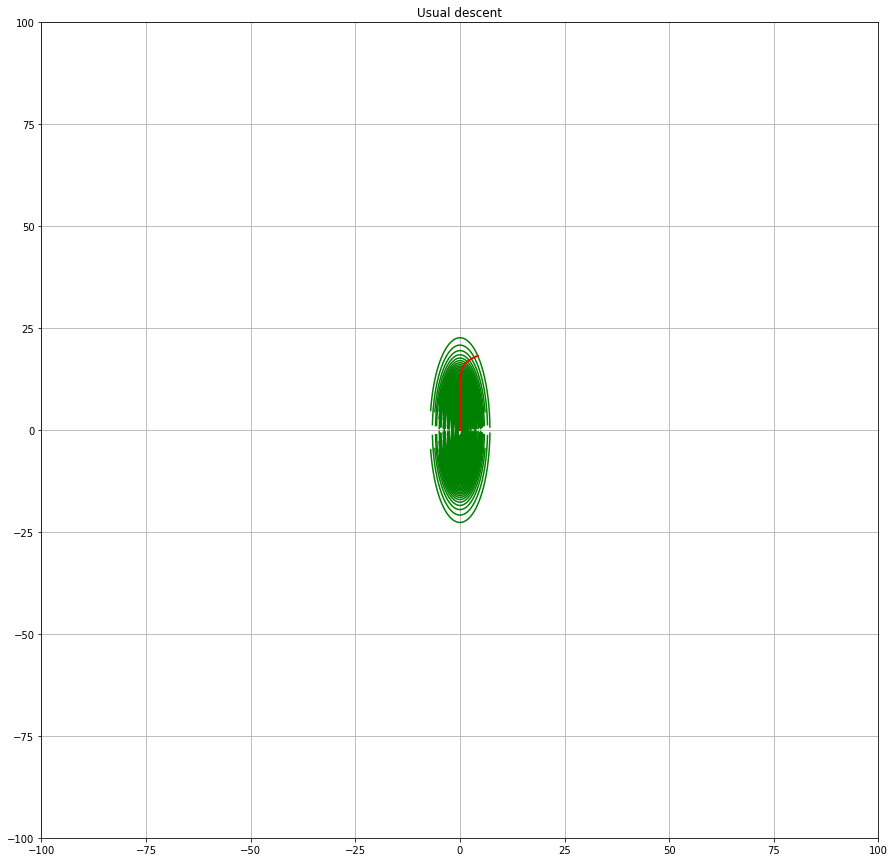

/home/birsert/.local/lib/python3.6/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in sqrt


Finish point: x -2.181046334320439e-06 y -9.324145901284903e-15
Iterations: 9
Whole time: 0.029784999999947104


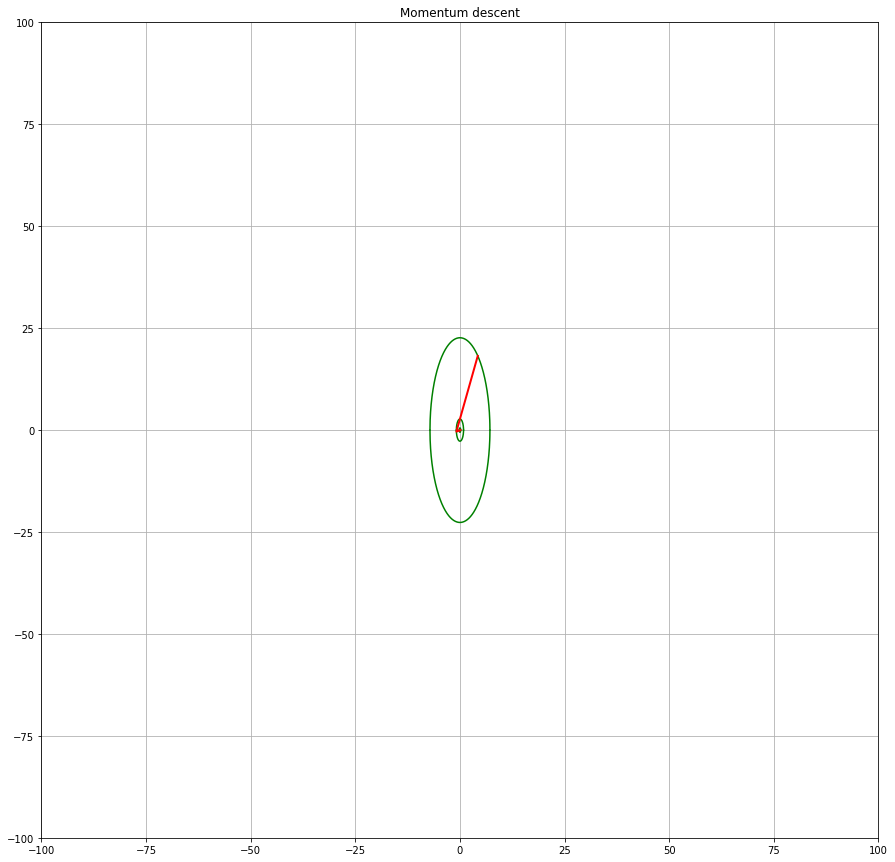

In [23]:
def func(x ,y):
    return 10 *(x**2) + y**2

def grad(x, y):
    return [20*x, 2*y]

def gradient_descent(start_x, start_y):
    
    start = time.clock()
    
    plt.figure(figsize=(15, 15))
    
    # initialisation of starting point
    
    data = {}
    data['x'] = [start_x]
    data['y'] = [start_y]
    
    # initialisation of coefs
    
    iteration = 0
    e = 1
    la = 1/100
    
    while (e > 10**-5):
        
        gr = grad(data['x'][iteration], data['y'][iteration])
        
        new_x = (data['x'][iteration] - la * gr[0])
        new_y = (data['y'][iteration] - la * gr[1])
        
        data['x'].append(new_x)
        data['y'].append(new_y)
        
        iteration += 1
        
        e = la * np.sqrt(gr[0]**2 + gr[1]**2)
        
        r = func(data['x'][iteration - 1], data['y'][iteration - 1])
        d = np.linspace(round(-np.sqrt(r/10)), round(np.sqrt(r)/3), 1000)
        y1 = np.sqrt(r - 10 * d**2)
        y2 = -y1
        
        plt.plot(d, y1, color='green')
        plt.plot(d, y2, color='green')
    
    print('Finish point:', 'x', data['x'][iteration], 'y', data['y'][iteration])
    print('Iterations:', iteration)
    
    finish = time.clock()
    
    print('Whole time:', finish - start)
    
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.grid(True)
    plt.plot(data['x'], data['y'], color='red', linewidth=2)
    plt.title('Usual descent')
    plt.show()
    
def momentum_descent(start_x, start_y):
    
    start = time.clock()
    
    plt.figure(figsize=(15, 15))
    
    data = {}
    data['x'] = [start_x]
    data['y'] = [start_y]
    
    s_x = [np.random.random() * 100]
    s_y = [np.random.random() * 100]
    
    # initialisation of coefs
    
    iteration = 0
    e = 1
    la = 1/100
    gamma = 1
    
    while (e > 10**-5):
        
        gr = grad(data['x'][iteration], data['y'][iteration])
        s_x = gamma * data['x'][iteration] + la * gr[0]
        s_y = gamma * data['y'][iteration] + la * gr[1]
        
        new_x = (data['x'][iteration] - s_x)
        new_y = (data['y'][iteration] - s_y)
        
        data['x'].append(new_x)
        data['y'].append(new_y)
        
        iteration += 1
        
        e = la * np.sqrt(gr[0]**2 + gr[1]**2)
        
        r = func(data['x'][iteration - 1], data['y'][iteration - 1])
        d = np.linspace(-np.sqrt(r / 10), np.sqrt(r / 10), 1000)
        y1 = np.sqrt(r - 10 * d**2)
        y2 = -y1
        
        plt.plot(d, y1, color='green')
        plt.plot(d, y2, color='green')
    
    print('Finish point:', 'x', data['x'][iteration], 'y', data['y'][iteration])
    print('Iterations:', iteration)
    
    finish = time.clock()
    
    print('Whole time:', finish - start)
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.grid(True)
    plt.plot(data['x'], data['y'], color='red', linewidth=2)
    plt.title('Momentum descent')
    plt.show()
        
        
start_x, start_y = np.random.random() * 100, np.random.random() * 100
gradient_descent(start_x, start_y)
momentum_descent(start_x, start_y)

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

In [ ]:
def func(x, y):
    return ((1-x)**2 + 100 * ((y - x**2)**2))

def grad(x, y):
    return [2*(200*(x**3) - 200*x*y+x-1),  200*(y - x**2)]

def gradient_descent(start_x, start_y):
    
    start = time.clock()
    
    data = {}
    data['x'] = [start_x]
    data['y'] = [start_y]
    
    s_x = 0
    s_y = 0
    # initialisation of coefs
    
    iteration = 0
    e = 1
    la = 0.001
    gamma = 0.3
    
    while (iteration < 10000000):
        
        gr = grad(data['x'][iteration] - gamma * s_x, data['y'][iteration] - gamma * s_y)
        s_x = gamma * data['x'][iteration] + la * gr[0]
        s_y = gamma * data['y'][iteration] + la * gr[1]
        
        new_x = (data['x'][iteration] - s_x)
        new_y = (data['y'][iteration] - s_y)
        
        data['x'].append(new_x)
        data['y'].append(new_y)
        
        e = ((data['x'][iteration] - new_x) + (data['y'][iteration] - new_y))/2
        iteration += 1
    
    print('Finish point:', 'x', data['x'][iteration], 'y', data['y'][iteration])
    print('Iterations:', iteration)
    
    finish = time.clock()
    
    print('Whole time:', finish - start)
    
gradient_descent(2, 2)

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)